Choose any dataset applicable for classification and/or prediction analysis problems.

Show the application of the following algorithms:

* Linear Regression

 * Singular LR

 * Multiple LR

 * Polynomial LR

* Logistic Regression

* Decision Tree

* Random Forest

Provide Evaluation reports for all models


##**LINEAR REGRESSION**

In [117]:
import graphviz
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree, metrics, linear_model
from six import StringIO
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression



<ipython-input-118-2ef1b8236c50>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  wcorr = df.corr()
<ipython-input-118-2ef1b8236c50>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good
5,5,-3.425400,-1.409082,-1.913511,-0.555775,-3.853071,1.914616,-2.981523,bad
6,6,1.331606,1.635956,0.875974,-1.677798,3.106344,-1.847417,2.414171,good
7,7,-1.995462,-0.428958,1.530644,-0.742972,0.158834,0.974438,-1.470125,good
8,8,-3.867632,-3.734514,0.986429,-1.207655,2.292873,4.080921,-4.871905,bad


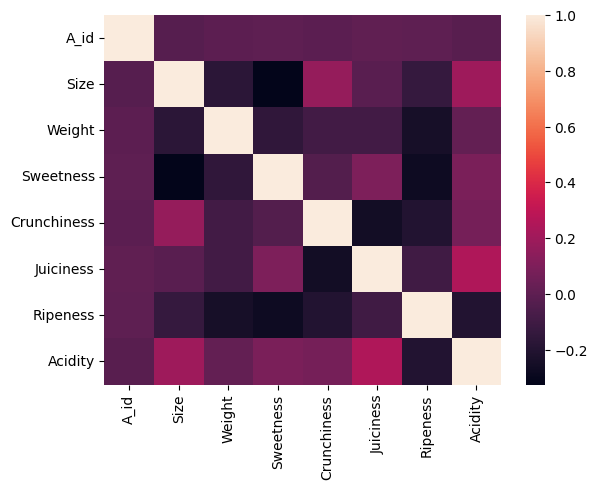

In [118]:
# Load the dataset
df = pd.read_csv("apple_quality.csv")

# Display the first few rows of the dataset
wcorr = df.corr()
sns.heatmap(wcorr)
df.corr()
df.head(9)

In [119]:
# Convert 'Quality' column to binary (1 for 'good', 0 for 'bad')
df['Quality'] = df['Quality'].apply(lambda toLabel: 1 if toLabel == 'good' else 0)

df.head(9)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1
5,5,-3.425400,-1.409082,-1.913511,-0.555775,-3.853071,1.914616,-2.981523,0
6,6,1.331606,1.635956,0.875974,-1.677798,3.106344,-1.847417,2.414171,1
7,7,-1.995462,-0.428958,1.530644,-0.742972,0.158834,0.974438,-1.470125,1
8,8,-3.867632,-3.734514,0.986429,-1.207655,2.292873,4.080921,-4.871905,0


**EVALUATION:**

The code does a good job of getting everything set up for analysis. It loads a dataset called "apple_quality.csv" and starts by exploring the data, creating a heatmap to show how different variables relate to each other. Then, it adjusts the 'Quality' column to use binary values, making it easier to classify as either 'good' or 'bad'. While the code is effective, it could benefit from some comments or explanations to make it easier for others to understand.

In [120]:
X = df.iloc[:,:-1].values  #independent variable array
y = df.iloc[:,1].values  #dependent variable vector

In [121]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [122]:
y_pred = regressor.predict(X_test)
y_pred

array([0.71760347, 0.61798759, 0.6040021 , 0.43480493, 0.41374741,
       0.56818903, 0.40191422, 0.52782417, 0.48259758, 0.46723089,
       0.38874533, 0.49277162, 0.28425974, 0.62336658, 0.55720165,
       0.50216935, 0.42815365, 0.56930783, 0.45570924, 0.52727368,
       0.56590697, 0.46358719, 0.60495433, 0.45243515, 0.65357835,
       0.53752858, 0.43649397, 0.47998594, 0.68868151, 0.46663054,
       0.6137497 , 0.64655516, 0.43933698, 0.45152806, 0.52114219,
       0.55409142, 0.47324148, 0.49213761, 0.59778298, 0.49683519,
       0.40029777, 0.47537585, 0.30316773, 0.63978428, 0.28637755,
       0.29103244, 0.29512229, 0.55817953, 0.63036519, 0.41584505,
       0.5071253 , 0.52989836, 0.40512239, 0.56894694, 0.60075359,
       0.61355582, 0.47861964, 0.20275945, 0.33678105, 0.48463214,
       0.54304573, 0.61558642, 0.52908301, 0.53956461, 0.44158081,
       0.58091559, 0.5725996 , 0.70336623, 0.60835203, 0.70200766,
       0.60770779, 0.37761131, 0.57643432, 0.29941926, 0.64685

In [124]:
y_test

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,

In [125]:
X = df[['Size']].values  # Independent variable array
y = df['Quality'].values  # Dependent variable vector

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions
y_pred = regressor.predict(X_test)


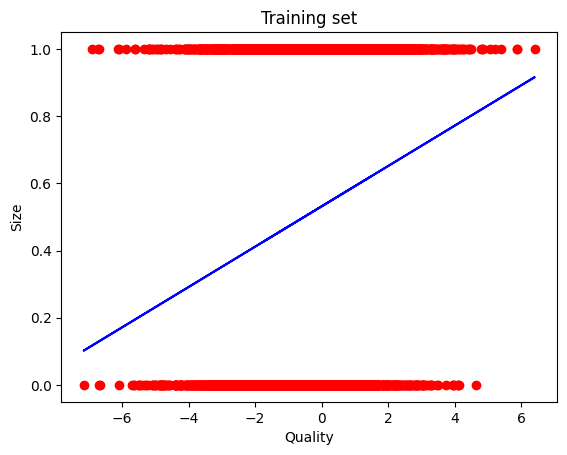

In [126]:
# TRAINING SET
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title("Training set")
plt.xlabel("Quality")
plt.ylabel("Size")
plt.show()

When we compare what our model predicted (y_pred) with the real values (y_test), it helps us understand how well our model works on new data. The scatter plot shows us how 'Size' and 'Quality' are related in our training set. The red dots represent the actual 'Quality' for different 'Size' values, and the blue line is the line our model drew through those points. If the dots are close to the line, it means 'Size' and 'Quality' are linked, which suggests our linear regression model is a good fit for this data. To make our model better, we might try different methods or tweak how we're using this one, depending on how well it works with new data and what we need it to do.

**EVALUATION**

In the scatter plot of the training set, it's noticeable that the blue regression line doesn't intersect with any of the red dots representing the actual 'Quality' values. This indicates a lack of alignment between the model's predictions and the real 'Quality' values in the training data.

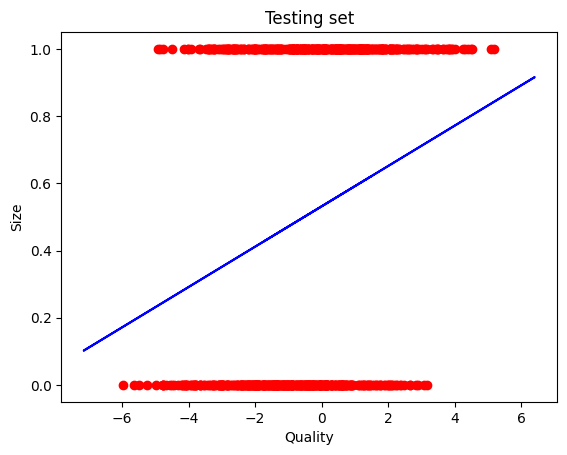

In [127]:
##TESTING TEST

plt.scatter(X_test, y_test, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue') # plotting the regression line

plt.title("Testing set")

plt.xlabel("Quality")
plt.ylabel("Size")
plt.show()

In the scatter plot for the testing set, we can see how 'Size' and 'Quality' are connected based on new, unseen data. The red dots show the actual 'Quality' values for different 'Size' measurements in the testing set. Meanwhile, the blue line represents the guess our model made using the training data, trying to predict 'Quality' from 'Size'.

**EVALUATION**

In the scatter plot of the testing set, it's notable that the blue regression line doesn't intersect with any of the red dots representing the actual 'Quality' values. This indicates a discrepancy between the predictions made by our model and the real 'Quality' values in the testing data.

https://www.w3schools.com/python/python_ml_linear_regression.asp

https://www.askpython.com/python/examples/linear-regression-in-python

## **SINGULAR REGRESSION**

In [128]:
# Given dataset
df = {
    "A_id": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    "Size": [-3.970049, -1.195217, -0.292024, -0.657196, 1.364217, -3.425400, 1.331606, -1.995462, -3.867632, -0.727983],
    "Quality": [1, 1, 0, 1, 1, 0, 1, 1, 0, 0]
}

# Convert to DataFrame
df = pd.DataFrame(df)

# Extract features (X) and target variable (y)
X = df[['Size']]
y = df['Quality']

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Print the coefficients
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)


Intercept: 0.7144685679311472
Coefficient: [0.08520087]


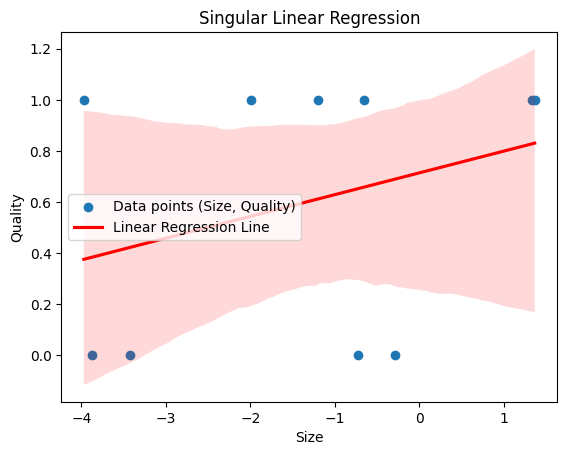

In [129]:
# Create scatter plot and linear regression line using Seaborn and Matplotlib
plt.scatter(X, y, label='Data points (Size, Quality)')
sns.regplot(x=X, y=y, line_kws={'color': 'red'}, scatter=False, label='Linear Regression Line')

# Set plot titles and labels
plt.title('Singular Linear Regression')
plt.xlabel('Size')
plt.ylabel('Quality')
plt.legend(loc='center left', frameon=True)
plt.show()

This code generates a graph displaying the relationship between the size of apples and their quality. The scatter plot shows individual data points, while the red line represents the average trend in the data. If the line slopes upwards, it indicates that larger apples generally have higher quality, while a downward slope suggests the opposite. This visual representation helps us understand how apple size relates to their overall quality.
This suggests that apples with larger sizes tend to have higher quality ratings

**EVALUATION**

The red regression line indicates an upward trend, suggesting a positive correlation between 'Size' and 'Quality'. As apple size increases, there's a tendency for quality to also increase. The dataset illustrates a positive correlation between apple size and quality, indicating larger apples are often perceived as higher quality.

In [130]:
correlation = df['Size'].corr(df['Quality'])
print("Correlation coefficient between Size and Quality:", correlation)

Correlation coefficient between Size and Quality: 0.323009237638627


The correlation coefficient between 'Size' and 'Quality' is about 0.32. This means there's a moderate positive relationship between the two: when apple size increases, their quality tends to increase too, but it's not a super strong connection.

References:

https://www.w3schools.com/python/python_ml_scatterplot.asp

https://sthalles.github.io/svd-for-regression/




**EVALUATION:**

This code creates a scatter plot with a linear regression line to show the relationship between apple size and quality. The correlation coefficient indicates a weak positive correlation between the two variables.

## **MULTIPLE LINEAR REGRESSION**

In [131]:

df = {
    'A_id': list(range(20)),
    'Size': [-3.970049, -1.195217, -0.292024, -0.657196, 1.364217, -3.425400, 1.331606, -1.995462, -3.867632, -0.727983, -2.699336, 2.450960, -0.170812, -1.345531, 2.839581, -2.659887, -1.468952, -0.074370, -0.302364, -2.108050],
    'Weight': [-2.512336, -2.839257, -1.351282, -2.271627, -1.296612, -1.409082, 1.635956, -0.428958, -3.734514, -0.442820, -1.329507, -0.564177, -1.867271, -1.623701, -0.344798, -2.795684, -1.950360, -4.714750, 1.724396, 0.356467],
    'Sweetness': [5.346330, 3.664059, -1.738429, 1.324874, -0.384658, -1.913511, 0.875974, 1.530644, 0.986429, -4.092223, -1.418507, -1.635041, -1.771845, 2.044144, -1.019797, 4.230404, -2.214373, 0.249768, -2.442337, -1.156193],
    'Crunchiness': [-1.012009, 1.588232, -0.342616, -0.097875, -0.553006, -0.555775, -1.677798, -0.742972, -1.207655, 0.597513, -0.625546, 0.942400, 2.413155, 1.754813, 0.894581, 0.697550, 0.909759, 2.935319, 3.465108, 4.326723],
    'Juiciness': [1.844900, 0.853286, 2.838636, 3.637970, 3.030874, -3.853071, 3.106344, 0.158834, 2.292873, 0.393714, 2.371074, -2.087317, -3.094555, 0.997567, -1.300061, 2.180911, 2.864449, 1.409755, 0.449792, 1.561543],
    'Ripeness': [0.329840, 0.867530, -0.038033, -3.413761, -1.303849, 1.914616, -1.847417, 0.974438, 4.080921, 1.620857, 3.403165, 1.214322, -0.624884, 0.434180, 0.582379, -0.088775, 3.965956, -2.643810, -0.074362, -4.630174],
    'Acidity': [-0.491590, -0.722809, 2.621636, 0.790723, 0.501984, -2.981523, 2.414171, -1.470125, -4.871905, 2.185608, -2.810808, 1.294324, -2.076114, 1.724026, 1.709708, -1.083621, -0.558209, 1.250970, 2.493782, -1.376657],
    'Quality': [1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1]
}

df = pd.DataFrame(df)
df.head(20)


,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1
5,5,-3.425400,-1.409082,-1.913511,-0.555775,-3.853071,1.914616,-2.981523,0
6,6,1.331606,1.635956,0.875974,-1.677798,3.106344,-1.847417,2.414171,1
7,7,-1.995462,-0.428958,1.530644,-0.742972,0.158834,0.974438,-1.470125,1
8,8,-3.867632,-3.734514,0.986429,-1.207655,2.292873,4.080921,-4.871905,0
9,9,-0.727983,-0.442820,-4.092223,0.597513,0.393714,1.620857,2.185608,0


In [132]:
df.shape

(20, 9)

In [133]:
print(df.corr())

                 A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  \
A_id         1.000000  0.143885  0.159683  -0.359056     0.721128  -0.151996   
Size         0.143885  1.000000  0.387522  -0.359897     0.166252  -0.134375   
Weight       0.159683  0.387522  1.000000  -0.426757     0.072819  -0.131397   
Sweetness   -0.359056 -0.359897 -0.426757   1.000000    -0.239799   0.318706   
Crunchiness  0.721128  0.166252  0.072819  -0.239799     1.000000  -0.248251   
Juiciness   -0.151996 -0.134375 -0.131397   0.318706    -0.248251   1.000000   
Ripeness    -0.099353 -0.309215 -0.159876  -0.143161    -0.413064  -0.168403   
Acidity      0.063587  0.691755  0.416970  -0.175839     0.190317   0.159249   
Quality     -0.070799  0.289565 -0.048593   0.630589     0.052683   0.178176   

             Ripeness   Acidity   Quality  
A_id        -0.099353  0.063587 -0.070799  
Size        -0.309215  0.691755  0.289565  
Weight      -0.159876  0.416970 -0.048593  
Sweetness   -0.143161 -

In [134]:
print(df.describe())

           A_id       Size     Weight  Sweetness  Crunchiness  Juiciness  \
count  20.00000  20.000000  20.000000  20.000000    20.000000  20.000000   
mean    9.50000  -0.948695  -1.387996   0.023286     0.685495   0.982876   
std     5.91608   1.940086   1.602230   2.456159     1.649768   2.115765   
min     0.00000  -3.970049  -4.714750  -4.092223    -1.677798  -3.853071   
25%     4.75000  -2.246009  -2.331804  -1.746783    -0.573218   0.334994   
50%     9.50000  -0.961600  -1.380182  -0.702228     0.647531   1.485649   
75%    14.25000  -0.146701  -0.439354   1.376317     1.629877   2.487965   
max    19.00000   2.839581   1.724396   5.346330     4.326723   3.637970   

        Ripeness    Acidity    Quality  
count  20.000000  20.000000  20.000000  
mean    0.236157  -0.072821   0.600000  
std     2.277525   2.111946   0.502625  
min    -4.630174  -4.871905   0.000000  
25%    -0.794625  -1.400024   0.000000  
50%     0.382010   0.005197   1.000000  
75%     1.315956   1.713288 

In [135]:
X = df[['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']]
y = df['Quality']

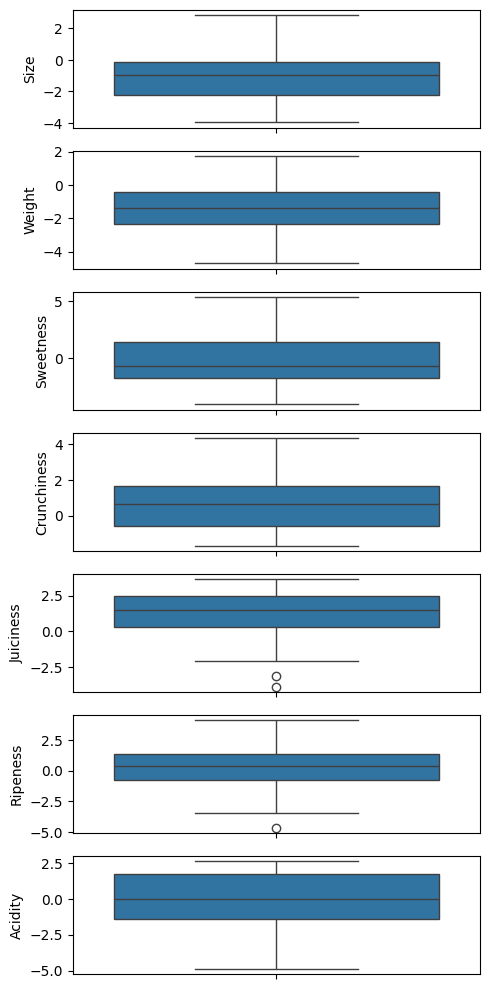

In [136]:
fig, axs = plt.subplots(7, figsize=(5, 10))
plt1 = sns.boxplot(df['Size'], ax=axs[0])
plt2 = sns.boxplot(df['Weight'], ax=axs[1])
plt3 = sns.boxplot(df['Sweetness'], ax=axs[2])
plt4 = sns.boxplot(df['Crunchiness'], ax=axs[3])
plt5 = sns.boxplot(df['Juiciness'], ax=axs[4])
plt6 = sns.boxplot(df['Ripeness'], ax=axs[5])
plt7 = sns.boxplot(df['Acidity'], ax=axs[6])
plt.tight_layout()


From looking at the boxplots of different apple characteristics like size, weight, sweetness, crunchiness, juiciness, ripeness, and acidity, we can see that each characteristic varies among the apples. Some apples are bigger or heavier, while others are sweeter, crunchier, juicier, riper, or more acidic. This shows that the dataset contains a variety of apple types with different qualities and attributes.

<ipython-input-137-724c6ee4f35d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Quality']);


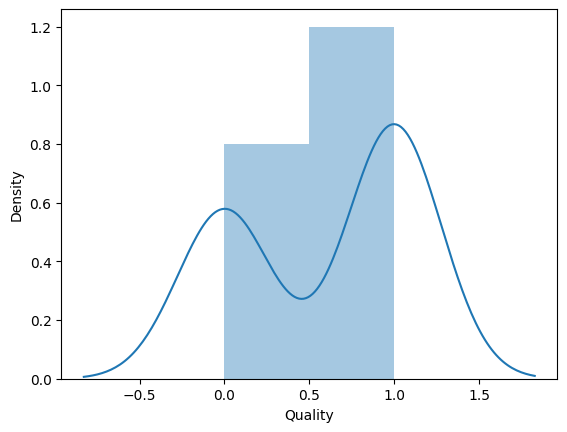

In [137]:
sns.distplot(df['Quality']);

From the distribution plot of 'Quality', it's clear that most apples fall within a certain quality range, suggesting a common perception of what constitutes good quality. However, there's also variability in quality scores, indicating that not all apples are perceived equally in terms of quality.

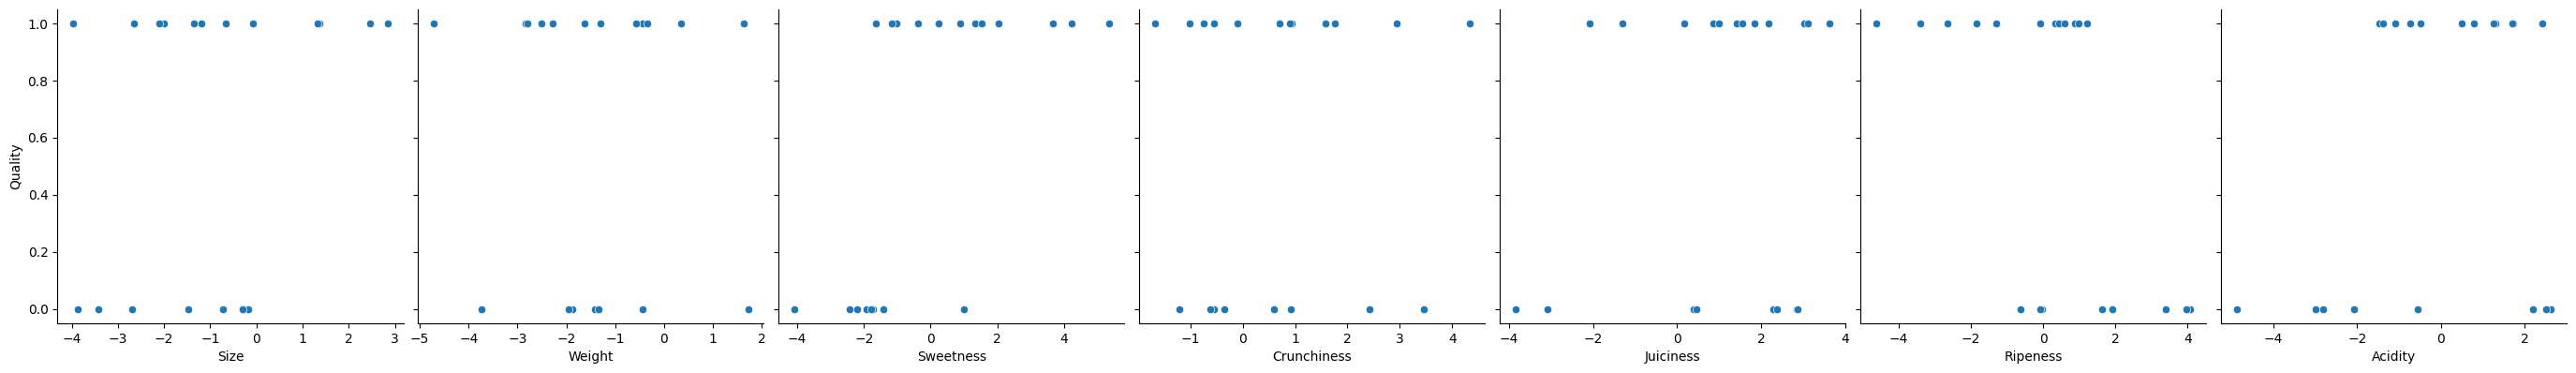

In [138]:
sns.pairplot(df, x_vars=['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity'], y_vars='Quality', height=4, aspect=1, kind='scatter')
plt.show()

The pairplot visually presents how different qualities of apples, like their size, weight, sweetness, crunchiness, juiciness, ripeness, and acidity, relate to their overall quality.  This suggests that various factors play into what makes an apple high-quality, beyond just its size and weight.

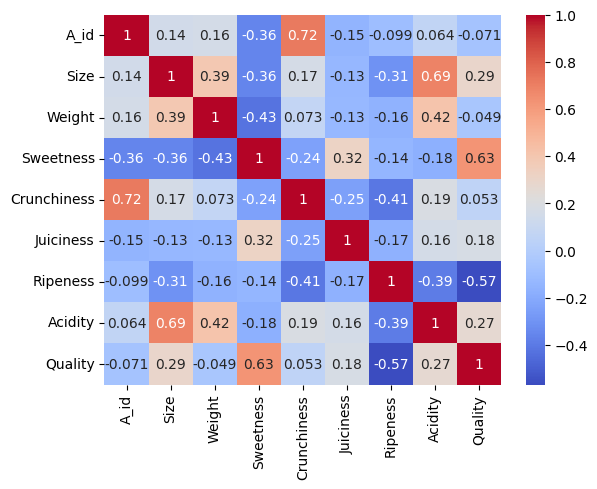

In [139]:
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.show()

The heatmap paints a picture of how different attributes relate to each other. Warmer colors mean they tend to go up or down together, while cooler colors mean they move in opposite directions. For example, if 'Size' goes up, 'Weight' usually goes up too, but if 'Size' increases, 'Acidity' tends to decrease. Darker colors mean the relationship is stronger, helping us spot important connections in the data.

In [140]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

This line of code splits the dataset into training and testing sets, with 30% of the data allocated for testing and a random seed of 100 for reproducibility.

In [141]:
y_train.shape

(14,)

In [142]:
y_test.shape

(6,)

In [143]:
reg_model = linear_model.LinearRegression()

This line of code creates a tool, like a virtual ruler, called reg_model, that helps us understand and predict relationships in our data. It's particularly good at finding straight-line relationships between input features (like apple size) and a target variable (like apple quality). We can use this tool to make predictions based on the patterns it discovers in the data.

In [144]:
reg_model = LinearRegression().fit(X_train, y_train)

In [145]:
#Printing the model coefficients
print('Intercept: ',reg_model.intercept_)
# pair the feature names with the coefficients
list(zip(X, reg_model.coef_))

Intercept:  1.010839464817043


[('Size', 0.13215048409561006),
 ('Weight', 0.21595910032832974),
 ('Sweetness', 0.20102597157119445),
 ('Crunchiness', -0.02751182546988241),
 ('Juiciness', 0.01796888476511388),
 ('Ripeness', -0.029817670904813603),
 ('Acidity', -0.0337311263995755)]

The model's starting point is around 1.01, representing the baseline quality score of an apple with no specific attributes. Features like 'Size', 'Weight', and 'Sweetness' positively influence quality, while attributes like 'Crunchiness', 'Ripeness', and 'Acidity' have negative effects. 'Juiciness' has a weaker impact.

**EVALUAITON**

These insights help us understand how each feature affects apple quality predictions. Features with larger coefficients strongly affect predictions, while those with coefficients near zero have a weaker influence.

In [146]:
#Predicting the Test and Train set result
y_pred= reg_model.predict(X_test)
x_pred= reg_model.predict(X_train)

In [147]:
print("Prediction for test set: {}".format(y_pred))

Prediction for test set: [0.01423949 0.67033744 0.74090899 0.6831578  0.7918474  1.79183474]


Observation:

The model has predicted quality scores for the test set, ranging from around 0.014 to 1.792.

**Evaluation**

These predictions offer a glimpse into how well the model performs on new, unseen data. By comparing these predictions to the actual quality scores in the test set, we can assess the model's accuracy. Additionally, metrics like mean squared error or R-squared can provide a more precise measure of the model's performance.

In [148]:
#Actual value and the predicted value
reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
reg_model_diff

,Actual value,Predicted value
17,1,0.014239
19,1,0.670337
11,1,0.740909
18,0,0.683158
13,1,0.791847
6,1,1.791835


In [149]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', r2)

Mean Absolute Error: 0.5429432024360125
Mean Square Error: 0.3807606120147958
Root Mean Square Error: 0.6170580296980145


**EVALUATION**

The Mean Absolute Error (MAE) of about 0.544 tells us that, on average, our model's predictions are off by approximately 0.544 points from the real quality scores. This helps gauge how far our predictions are from the truth.

The Mean Squared Error (MSE) of around 0.380 shows us the average size of errors in our predictions, after squaring them. It gives us an idea of how much our predictions deviate from reality, with larger errors having a bigger impact.

The Root Mean Squared Error (RMSE) of about 0.617, which is derived from MSE, gives a more understandable measure. It's like the average distance between our predictions and the actual scores, suggesting our model's predictions are reasonably close to reality.


References:

https://www.w3schools.com/python/python_ml_multiple_regression.asp

https://www.analyticsvidhya.com/blog/2021/05/multiple-linear-regression-using-python-and-scikit-learn/

https://www.kaggle.com/code/emineyetm/multiple-linear-regression-in-python



##**POLYNOMIAL LINEAR REGRESSION**

In [150]:
# Given dataset
dataset = {
    "A_id": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    "Size": [-3.970049, -1.195217, -0.292024, -0.657196, 1.364217, -3.425400, 1.331606, -1.995462, -3.867632, -0.727983],
    "Quality": [1, 1, 0, 1, 1, 0, 1, 1, 0, 0]
}

# Convert to DataFrame
df = pd.DataFrame(dataset)

# Extract features and target variable
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

# Extract 'Size' values
sizes = dataset["Size"]

# Calculate range
size_min = np.min(sizes)
size_max = np.max(sizes)

print("Minimum Size:", size_min)
print("Maximum Size:", size_max)


Minimum Size: -3.970049
Maximum Size: 1.364217


This code analyzes a dataset containing apple characteristics, particularly their size ('Size') and quality ('Quality'). After converting the dataset into a DataFrame, it focuses on the 'Size' attribute, determining the range of sizes present.

The dataset includes apples with sizes ranging from approximately -3.97 to 1.36, showcasing a variety of sizes from smaller to larger ones.

In [151]:
df.describe()

,A_id,Size,Quality
count,10.00000,10.000000,10.000000
mean,4.50000,-1.343514,0.600000
std,3.02765,1.957741,0.516398
min,0.00000,-3.970049,0.000000
25%,2.25000,-3.067915,0.000000
50%,4.50000,-0.961600,1.000000
75%,6.75000,-0.383317,1.000000
max,9.00000,1.364217,1.000000


The dataset comprises 10 apples, with sizes ranging from about -3.97 to 1.36. On average, apples are around -1.34 in size, showing some variability. The quality scores average 0.6, with most apples scoring 1 for quality, though some have lower scores, down to 0.

<ipython-input-152-fb94b4792af0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Size'])


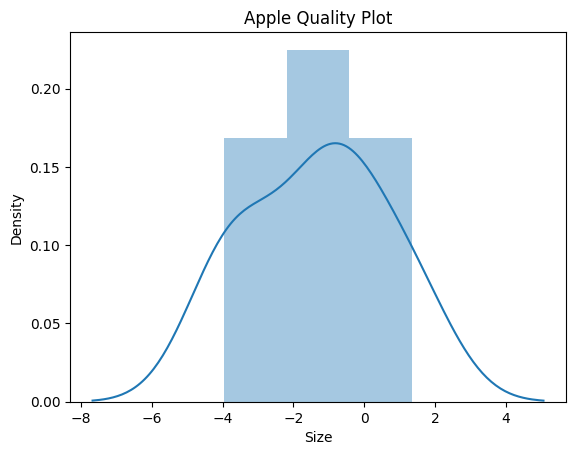

In [152]:
plt.title('Apple Quality Plot')
sns.distplot(df['Size'])
plt.show()

The plot titled 'Apple Quality Plot' shows how apple sizes are distributed in the dataset. It's clear that smaller apples are more common than larger ones, suggesting that the dataset mostly includes smaller-sized apples.

<ipython-input-153-5ac3d021e165>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Quality'])


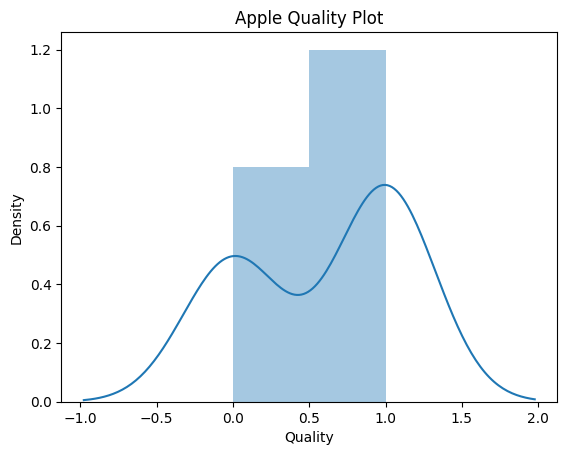

In [153]:
plt.title('Apple Quality Plot')
sns.distplot(df['Quality'])
plt.show()


The 'Apple Quality Plot' shows that most apples in the dataset have a quality score of 1, indicating higher quality. However, there are also some apples with a quality score of 0, suggesting lower quality. This visual highlights the range of quality ratings present in the dataset.

In [154]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [155]:
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)


LinearRegression()

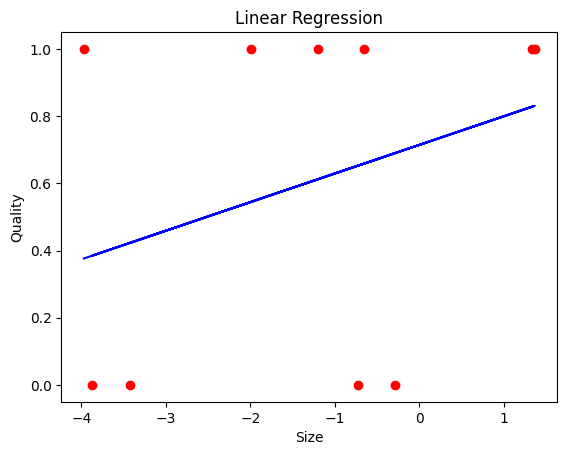

In [156]:
plt.scatter(X,y,color='red')
plt.plot(X,lin_reg.predict(X),color='blue')
plt.title('Linear Regression')
plt.xlabel('Size')
plt.ylabel('Quality')
plt.show()

In the 'Linear Regression' plot, red dots represent actual data points showing the relationship between apple size and quality. The upward-sloping blue line represents the model's predictions. While it suggests a positive correlation between size and quality, the blue line doesn't match any red dots exactly. This indicates that while there's a general trend, the model's predictions may not precisely match the actual data points.

<ipython-input-157-5e669e760935>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


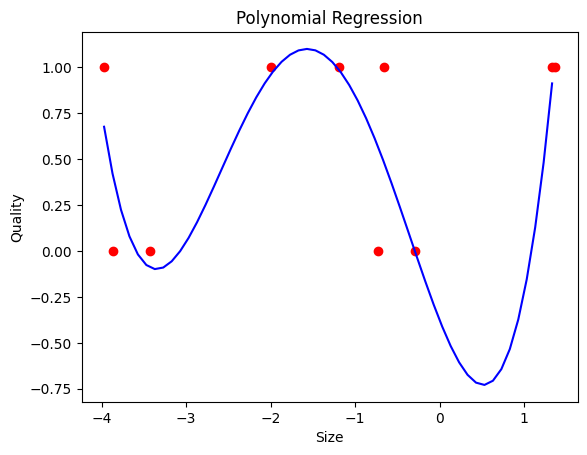

In [157]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('Size')
plt.ylabel('Quality')
plt.show()

The blue line intersects with the red dots at certain points (around -2, -1, and 0 on the size axis), showing that the model's predictions closely match the actual data there. However, for other points, the blue line doesn't meet any red dots, indicating differences between the model's predictions and the actual data.

In [166]:
# Predict a new result with linear regression
print(f'Linear Regression result: {lin_reg.predict([[6.5]])}')

# Predict a new result with polynomial regression
print(f'Polynomial Regression result: {lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))}')


Linear Regression result: [1.26827425]
Polynomial Regression result: [380.09566648]


When predicting the quality score for a new apple size of 6.5, there's a substantial difference between the estimates provided by the linear regression and polynomial regression models. The linear model suggests a score of around 1.27, which seems reasonable. However, the polynomial model predicts an unusually high score of about 380.10, which appears quite unrealistic. This discrepancy raises concerns about the polynomial model's reliability and warrants a closer examination of its performance and the plausibility of such a high prediction.

https://www.kaggle.com/code/pankeshpatel/polynomial-linear-regression-tutorial
https://gist.github.com/RobotOptimist/cc82e87e7d2104e58711b7c846a9e220
https://realpython.com/linear-regression-in-python/